In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
import time
from sklearn.metrics import davies_bouldin_score

#Importing data
# data_raw = pd.read_csv(r"C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Assignment 2 Dataset\water-treatment.csv")
data_raw_st = pd.read_csv(r"C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Assignment 2 Dataset\Sales_Transactions_Dataset_Weekly.csv")
data_raw_st.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [2]:
data_raw_st=data_raw_st.drop(columns='Product_Code')
#Scaling the Data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(data_raw_st)
data_scale_st=scaler.transform(data_raw_st)
# data_scale=data_raw
# print(data_scale_st)
#Applying PCA to Data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_st=pca.fit_transform(data_scale_st)
# print(data_st)

In [3]:
data_raw_wt = pd.read_csv(r"C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Assignment 2 Dataset\water-treatment.csv")
data_raw_wt.head()

,title,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,D-4/3/90,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,D-6/3/90,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


In [4]:
data_raw_wt=data_raw_wt.drop(columns='title')
data_raw_wt.head()

# Get ndArray of all column names 
data_raw_wt.columns.values
nrow,ncol=data_raw_wt.shape
for col_name in list(data_raw_wt.columns.values):
    data_raw_wt[col_name]=data_raw_wt[col_name].fillna(data_raw_wt[col_name].mean())

In [5]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(data_raw_wt)
data_scale_wt=scaler.transform(data_raw_wt)
#Applying PCA to Data
pca = PCA(n_components=2)
data_wt=pca.fit_transform(data_scale_wt)
# print(data_st)

In [6]:
data_raw_live = pd.read_csv(r"C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Assignment 2 Dataset\live.csv")
data_raw_live.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [7]:
data_raw_live=data_raw_live.drop(columns='status_id')
data_raw_live=data_raw_live.drop(columns='status_type')
data_raw_live=data_raw_live.drop(columns='status_published')
data_raw_live=data_raw_live.drop(columns='Column1')
data_raw_live=data_raw_live.drop(columns='Column2')
data_raw_live=data_raw_live.drop(columns='Column3')
data_raw_live=data_raw_live.drop(columns='Column4')

In [8]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(data_raw_live)
data_scale_live=scaler.transform(data_raw_live)
#Applying PCA to Data
pca = PCA(n_components=2)
data_live=pca.fit_transform(data_scale_live)

In [9]:
#Importing data
data_raw = pd.read_csv(r"C:\Users\udit sharma\Desktop\Aut\Data Mining and Machine Learning\Assignment 2 Dataset\Dow Jones Index.csv")

#Cleaning the Data
data_raw.describe(include='all')
data_raw.isnull().sum()
data_raw.percent_change_volume_over_last_wk = data_raw.percent_change_volume_over_last_wk.fillna(data_raw.percent_change_volume_over_last_wk.mean())
data_raw.previous_weeks_volume = data_raw.previous_weeks_volume.fillna(data_raw.previous_weeks_volume.mean())
data_raw.head()
# data_raw.columns[3:7]
data_raw[data_raw.columns[3:7]] = data_raw[data_raw.columns[3:7]].replace('[\$,]', '', regex=True).astype(float)
data_raw[data_raw.columns[11:13]] = data_raw[data_raw.columns[11:13]].replace('[\$,]', '', regex=True).astype(float)
data_raw.head()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_raw['stock']= label_encoder.fit_transform(data_raw['stock'])
data_raw=data_raw.drop(columns='date')
data_raw.head()
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(data_raw)
data_scale=scaler.transform(data_raw)
# data_scale=data_raw
# print(data_scale)
#Applying PCA to Data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_dow=pca.fit_transform(data_scale)
# print(data_dow)

Text(0.5, 0.98, '2-D VIsualization of all Datasets')

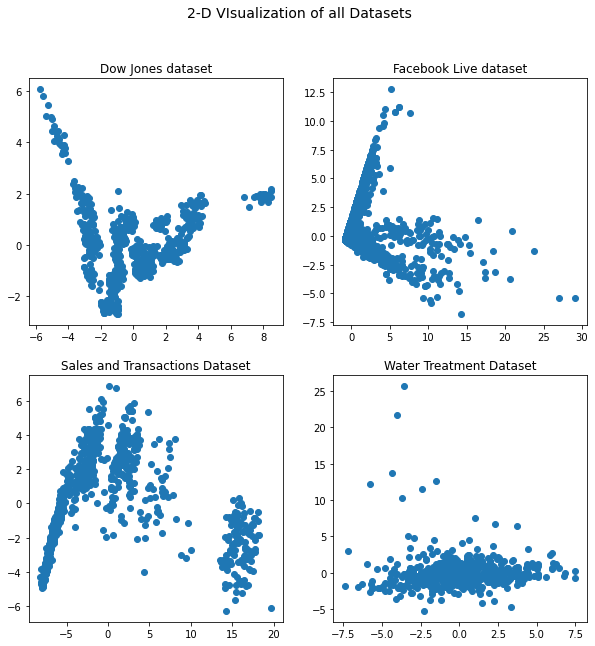

In [10]:
fig, ay = plt.subplots(2,2,figsize=(10,10))
ax=[ay[0][0],ay[0][1],ay[1][0],ay[1][1]]
data_set_names=["Dow Jones dataset","Facebook Live dataset","Sales and Transactions Dataset","Water Treatment Dataset"]
ax[2].scatter(data_st[:,0], data_st[:,1])
ax[3].scatter(data_wt[:,0], data_wt[:,1])
ax[1].scatter(data_live[:,0], data_live[:,1])
ax[0].scatter(data_dow[:,0], data_dow[:,1])
ax[0].set_title(data_set_names[0])
ax[1].set_title(data_set_names[1])
ax[2].set_title(data_set_names[2])
ax[3].set_title(data_set_names[3])
fig.suptitle("2-D VIsualization of all Datasets", fontsize=14) 

In [11]:
from sklearn.cluster import KMeans
import sklearn

data_set_names=["Dow Jones dataset","Facebook Live dataset","Sales and Transactions Dataset","Water Treatment Dataset"]
data_sets=[data_raw,data_raw_live,data_raw_st,data_raw_wt]
# data_sets=[data_scale,data_scale_live,data_scale_st,data_scale_wt]
# data_sets=[data_dow,data_live,data_st,data_wt]

    

for x,data_set11 in enumerate(data_sets):
 maxsil=0
 pcat=2
 km=2
 _,ncol=data_set11.shape
 print(ncol)
 for pcaval in range(2,ncol):
   for k in range(2,15):
    data_set=PCA(pcaval).fit_transform(data_set11)
    km_pipe =KMeans(n_clusters=k)
    km_ftp=km_pipe.fit_predict(data_set11)
    km_pipe_fit=km_pipe.fit(data_set11)
    score = silhouette_score(data_set11,km_pipe_fit.labels_ )
    if(score>maxsil):
        maxsil=score
        km=k
        pcat=pcaval
 print(data_set_names[x],maxsil,pcat,km)

15
Dow Jones dataset 0.736197877869703 8 2
9
Facebook Live dataset 0.8721918902988716 2 2
106
Sales and Transactions Dataset 0.7393685304087416 2 2
38
Water Treatment Dataset 0.5827431902862794 2 2


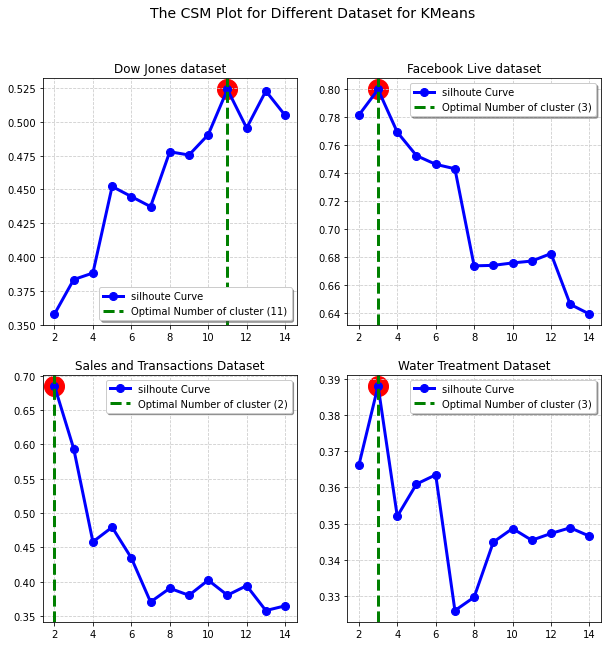

In [12]:
from sklearn.cluster import KMeans
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from tempfile import mkdtemp
from shutil import rmtree

data_set_names=["Dow Jones dataset","Facebook Live dataset","Sales and Transactions Dataset","Water Treatment Dataset"]
# data_sets=[data_raw,data_raw_live,data_raw_st,data_raw_wt]
# data_sets=[data_scale_st,data_scale_wt,data_scale_live,data_scale]
data_sets=[data_dow,data_live,data_st,data_wt]
data_set_sil_scores=[]
pcaval=[2,2,2,2]
fig, ay = plt.subplots(2,2,figsize=(10,10))
ax=[ay[0][0],ay[0][1],ay[1][0],ay[1][1]]
for x,data_set in enumerate(data_sets):
    
 sil_scores = []
 
 for k in range(2,15):
    cachedir = mkdtemp()
    kms=KMeans(n_clusters=k)
    km_pipe = Pipeline([('SS',StandardScaler()),('PCA',PCA(n_components=pcaval[x])),('kmeans',kms)],memory=cachedir)
    km_ftp=km_pipe.fit_predict(data_set)
    km_pipe_fit=km_pipe.fit(data_set)
    
    score = silhouette_score(data_set,km_pipe_fit.named_steps['kmeans'].labels_ )
    sil_scores.append(score)
 data_set_sil_scores.append(sil_scores)
# print(data_set_sil_scores)
optimum_k=[]


for i in range(4):
  ax[i].plot(range(2,15),data_set_sil_scores[i],'bo-',color='blue',linewidth=3,markersize=8,label='silhoute Curve')
  ax[i].grid(which='major',color='#cccccc',linestyle='--')
#  _ = ax[i].title('Silhoute curve for predicting optimal number of clusters', family='Arial',fontsize=14)
  k=data_set_sil_scores[i].index(max(data_set_sil_scores[i]))
  num_opt_clus=k+2
  optimum_k.append(num_opt_clus)
 #line to mark optimal number of k in curve
  ax[i].axvline(x=k+2, linestyle='--', c='green',linewidth=3,label='Optimal Number of cluster ({})'.format(k+2))
  ax[i].scatter(k+2, data_set_sil_scores[i][k],c='red',s=400)
  ax[i].legend(shadow=True)
  ax[i].set_title(data_set_names[i])
fig.suptitle("The CSM Plot for Different Dataset for KMeans", fontsize=14) 
plt.show()

In [13]:
from sklearn.cluster import KMeans
from matplotlib import cm
data_set_list=[data_dow,data_live,data_st,data_wt]
data_set_names=["Dow Jones","Facebook Live","Sales and Transactions","Water Treatment"]
# optimum_k=[9,3,4,7]
# optimum_eps=[0.71,0.41,0.36,0.67]
# optimum_n=[9,3,4,7]
def calClusterCenters(data_set_sample,data_set_labels):
    clustcord=[]
    clus_list=[]
    for i in range(len(data_set_sample)):
        if(data_set_labels[i] not in clus_list):
            clus_list.append(data_set_labels[i])
    for i in clus_list:
        subclus=[]
        x_cord=sum(data_set_sample[data_set_labels==i,0])
        y_cord=sum(data_set_sample[data_set_labels==i,1])
        count=0
        for j in range(len(data_set_sample)):
            if(data_set_labels[j]==i):
                count+=1
        clustcord.append([x_cord/count,y_cord/count,i])
    return clustcord

def sumSquareError(data_set_sample,data_set_labels):
    sse=0
    data_set_centroids=calClusterCenters(data_set_sample,data_set_labels)
    for i in range(len(data_set_sample)):
        k=0
        for j in range(len(data_set_centroids)):
            if(data_set_centroids[j][2]==data_set_labels[i]):
                k=j
        x_dist=data_set_centroids[k][0]-data_set_sample[i,0]
        y_dist=data_set_centroids[k][1]-data_set_sample[i,1]
        total_dist=(x_dist*x_dist+y_dist*y_dist)
        sse+=total_dist
    return sse

In [ ]:
from matplotlib import cm
from tabulate import tabulate
tablelistkm=[]
fig, ay = plt.subplots(2,2,figsize=(10,10))
ax=[ay[0][0],ay[0][1],ay[1][0],ay[1][1]]
fig, at = plt.subplots(2,2,figsize=(10,10))
ap=[at[0][0],at[0][1],at[1][0],at[1][1]]
for i,data_set in enumerate(data_set_list):
    data_set_km= KMeans(n_clusters=optimum_k[i])
    data_set_stime=time.time()
    data_set_kmfit=data_set_km.fit(data_set)
    data_set_etime=time.time()
    data_set_kmfp=data_set_km.fit_predict(data_set)
    sse=data_set_kmfit.inertia_
    silhoute_score_dataset = silhouette_score(data_set, data_set_kmfit.labels_)
    davies_bouldin_dataset= davies_bouldin_score(data_set,data_set_kmfit.labels_)
    data_set_ttime=data_set_etime-data_set_stime
    tablist=[data_set_names[i],silhoute_score_dataset,sumSquareError(data_set,data_set_kmfit.labels_),data_set_ttime,davies_bouldin_dataset]
    tablelistkm.append(tablist)
    
    cluster_labels = np.unique(data_set_kmfp)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data_set, data_set_kmfp, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for x, c in enumerate(cluster_labels):
     c_silhouette_vals = silhouette_vals[data_set_kmfp == c]
     c_silhouette_vals.sort()
     y_ax_upper += len(c_silhouette_vals)
     color = cm.jet(float(x) / n_clusters)
     ax[i].barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

     yticks.append((y_ax_lower + y_ax_upper) / 2.)
     y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    ax[i].axvline(silhouette_avg, color="red", linestyle="--")
    ax[i].set_title(data_set_names[i])
    ap[i].set_title(data_set_names[i])
    data_color=['red','green','blue','yellow','orange','violet','pink','grey','black','brown','olive','cyan']

    for x in range(n_clusters):  
     ap[i].scatter(data_set[data_set_kmfp == x,0],
            data_set[data_set_kmfp == x,1],
            s=50, c=data_color[x],
            marker='s', edgecolor='black',
            label='cluster '+str(x+1))

    ap[i].scatter(data_set_kmfit.cluster_centers_[:, 0],
            data_set_kmfit.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('06_02.png', dpi=300)
plt.show()
    
    
fig.suptitle("The CSM Plot for Different Dataset for KMeans", fontsize=14)  
plt.show()
print("The results for Kmeans are as follows:-")
print(tabulate(tablelistkm, headers=['Data Set','Silhouette Score','SSE score','Time Taken','Davies Bouldin']))    

In [ ]:
from sklearn.cluster import DBSCAN
data_set_names=["Dow Jones dataset","Facebook Live dataset","Sales and Transactions Dataset","Water Treatment Dataset"]
# data_sets=[data_raw,data_raw_st,data_raw_wt,data_raw_live,]
# data_sets=[data_scale,data_scale_live,data_scale_st,data_scale_wt]
# data_sets=[data_dow,data_live,data_st,data_wt]
data_set_sil_scores=[]
optimum_eps=[]
pca1 = PCA(n_components=2)
data_sets=[pca1.fit_transform(data_scale),pca1.fit_transform(data_scale_live),pca1.fit_transform(data_scale_st),pca1.fit_transform(data_scale_wt)]


fig, ay = plt.subplots(2,2,figsize=(10,10))
ax=[ay[0][0],ay[0][1],ay[1][0],ay[1][1]]

for j,data_set in enumerate(data_sets):
 start= 0.0
 stop= 1.0
 step = 0.01
 my_list = np.arange(start, stop+step, step)
 sildbscan=[]
 plter=[]
 max_eps=0.1
 max_silscore=0
 for i in range(80):
    db = DBSCAN(eps=.05+my_list[i],min_samples=4)
    data_dbscan = db.fit(data_set)
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    if(n_clusters_>0):
     sil_score=silhouette_score(data_set,labels)
     sildbscan.append(sil_score)
     plter.append(i)
     if(sil_score>max_silscore):
            max_silscore=sil_score
            max_eps=0.05+my_list[i]
 optimum_eps.append(max_eps)
 ax[j].plot(plter,sildbscan)
 ax[j].set_title(data_set_names[j])
plt.show()

In [ ]:
data_set_names=["Dow Jones","Facebook Live","Sales and Transactions","Water Treatment"]
tablelistdb=[]
fig, ay = plt.subplots(2,2,figsize=(10,10))
ax=[ay[0][0],ay[0][1],ay[1][0],ay[1][1]]
fig, at = plt.subplots(2,2,figsize=(10,10))
ap=[at[0][0],at[0][1],at[1][0],at[1][1]]
for i,data_set in enumerate(data_sets):
    data_set_dbscan=DBSCAN(eps=optimum_eps[i],min_samples=4)
    db_stime=time.time()
    data_dbfit=data_set_dbscan.fit(data_set)
    db_etime=time.time()
    data_dbfp=data_set_dbscan.fit_predict(data_set)
    silhoute_score_dataset = silhouette_score(data_set, data_dbfit.labels_)
    data_db_ttime=db_etime-db_stime
#     db_sse=sumSqaureError(data_set,data_dbfit.labels_,data_dbfir.cluster_centers_)
    daives_bouldindb=davies_bouldin_score(data_set, data_dbfit.labels_)
    tablist=[data_set_names[i],silhoute_score_dataset,sumSquareError(data_set,data_dbfit.labels_),data_db_ttime,daives_bouldindb]
    tablelistdb.append(tablist)
    
   
    cluster_labels = np.unique(data_dbfp)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data_set, data_dbfp, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for x, c in enumerate(cluster_labels):
     c_silhouette_vals = silhouette_vals[data_dbfp == c]
     c_silhouette_vals.sort()
     y_ax_upper += len(c_silhouette_vals)
     color = cm.jet(float(x) / n_clusters)
     ax[i].barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

     yticks.append((y_ax_lower + y_ax_upper) / 2.)
     y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    ax[i].axvline(silhouette_avg, color="red", linestyle="--")
    ax[i].set_title(data_set_names[i])
    ap[i].set_title(data_set_names[i])
    data_color=['red','green','blue','yellow','orange','violet','pink','grey','black','brown','olive','cyan']
    clus_center=calClusterCenters(data_set,data_dbfit.labels_)
    labels = data_dbfit.labels_

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    for x in range(-1,n_clusters_):  
     ap[i].scatter(data_set[data_dbfp == x,0],
            data_set[data_dbfp == x,1],
            s=50, c=data_color[x],
            marker='s', edgecolor='black',
            label='cluster '+str(x+1))

    ap[i].scatter(clus_center[:][0],
            clus_center[:][1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
fig.suptitle("The CSM Plot for Different Dataset for DBSCAN Clustering", fontsize=14)  
plt.show()
print("The results for DBSCAN are as follows:-")
print(tabulate(tablelistdb, headers=['data set','Silhouette Score','SSE score','Time Taken','Davies Bouldin']))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
data_set_names=["Dow Jones dataset","Facebook Live dataset","Sales and Transactions Dataset","Water Treatment Dataset"]
# data_sets=[data_raw_st,data_raw_wt,data_raw_live,data_raw]
# data_sets=[data_scale_st,data_scale_wt,data_scale_live,data_scale]
data_sets=[data_dow,data_live,data_st,data_wt]
data_set_sil_scores=[]

for x,data_set in enumerate(data_sets):
    
 sil_scores = []
 
 for k in range(2,15):
    cachedir = mkdtemp()
    AC=AgglomerativeClustering(n_clusters=k)
    ac_pipe = Pipeline([('SS',StandardScaler()),('PCA',PCA(n_components=pcaval[x])),('agglomerative',AC)],memory=cachedir)
    ac_ftp=ac_pipe.fit_predict(data_set)
    ac_pipe_fit=ac_pipe.fit(data_set)
    
    score = silhouette_score(data_set,ac_pipe_fit.named_steps['agglomerative'].labels_ )
    sil_scores.append(score)
 data_set_sil_scores.append(sil_scores)

optimum_n=[]
fig, ay = plt.subplots(2,2,figsize=(10,10))
ax=[ay[0][0],ay[0][1],ay[1][0],ay[1][1]]

for i in range(4):
  ax[i].plot(range(2,15),data_set_sil_scores[i],'bo-',color='blue',linewidth=3,markersize=8,label='silhoute Curve')
  ax[i].grid(which='major',color='#cccccc',linestyle='--')
#  _ = ax[i].title('Silhoute curve for predicting optimal number of clusters', family='Arial',fontsize=14)
  k=data_set_sil_scores[i].index(max(data_set_sil_scores[i]))
  num_opt_clus=k+2
  optimum_n.append(num_opt_clus)
 #line to mark optimal number of k in curve
  ax[i].axvline(x=k+2, linestyle='--', c='green',linewidth=3,label='Optimal Number of cluster ({})'.format(k+2))
  ax[i].scatter(k+2, data_set_sil_scores[i][k],c='red',s=400)
  ax[i].legend(shadow=True)
  ax[i].set_title(data_set_names[i])
fig.suptitle("The CSM Plot for Different Dataset for Agglomerative Clustering", fontsize=14) 
plt.show()

In [ ]:
data_set_names=["Dow Jones","Facebook Live","Sales and Transactions","Water Treatment"]
tablelistac=[]
fig, ay = plt.subplots(2,2,figsize=(10,10))
ax=[ay[0][0],ay[0][1],ay[1][0],ay[1][1]]
fig, at = plt.subplots(2,2,figsize=(10,10))
ap=[at[0][0],at[0][1],at[1][0],at[1][1]]
for i,data_set in enumerate(data_set_list):
    data_set_ac=AgglomerativeClustering(optimum_n[i])
    ac_stime=time.time()
    data_acfit=data_set_ac.fit(data_set)
    ac_etime=time.time()
    data_acfp=data_set_ac.fit_predict(data_set)
    silhoute_score_dataset = silhouette_score(data_set, data_acfit.labels_)
    data_ac_ttime=ac_etime-ac_stime
    daives_bouldinac=davies_bouldin_score(data_set, data_acfit.labels_)
    tablist=[data_set_names[i],silhoute_score_dataset,sumSquareError(data_set,data_acfit.labels_),data_ac_ttime,daives_bouldinac]
    tablelistac.append(tablist)
    
    cluster_labels = np.unique(data_acfp)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data_set, data_acfp, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for x, c in enumerate(cluster_labels):
     c_silhouette_vals = silhouette_vals[data_acfp == c]
     c_silhouette_vals.sort()
     y_ax_upper += len(c_silhouette_vals)
     color = cm.jet(float(x) / n_clusters)
     ax[i].barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

     yticks.append((y_ax_lower + y_ax_upper) / 2.)
     y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    ax[i].axvline(silhouette_avg, color="red", linestyle="--")
    ax[i].set_title(data_set_names[i])
    ap[i].set_title(data_set_names[i])
    data_color=['red','green','blue','yellow','orange','violet','pink','grey','black','brown','olive','cyan']

    clus_center=calClusterCenters(data_set,data_acfit.labels_)
    for x in range(n_clusters):  
     ap[i].scatter(data_set[data_acfp == x,0],
            data_set[data_acfp == x,1],
            s=50, c=data_color[x],
            marker='s', edgecolor='black',
            label='cluster '+str(x+1))

    ap[i].scatter(clus_center[:][0],
            clus_center[:][1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
fig.suptitle("The CSM Plot for Different Dataset for Agglomerative Clustering", fontsize=14)  
plt.show()
print("The results for Agglomerative Clustering are as follows:-")
print(tabulate(tablelistac, headers=['data set','Silhouette Score','SSE score','Time Taken','Davies Bouldin']))

In [ ]:
# # # def sumSquareError():
# data_set_km= KMeans(n_clusters=9)
# data_dow_kmfit=data_set_km.fit(data_dow)
# # print(data_dow_kmfit.labels_)
# # print(calClusterCenters(data_dow,data_dow_kmfit.labels_))
# # # print(data_dow_kmfit.labels_)
# # print(data_set_kmfit.cluster_centers_)
# # data_dow_kmeans=data_set_km.fit_predict(data_dow)
# # # print(data_set_kmfit.cluster_centers_)
# # # print(len(data_dow))
# # # print(data_dow)

# # data_color=['lightblue','green','blue','yellow','orange','violet','pink','grey','black']

# # for i in range(9):  
# #  plt.scatter(data_dow[data_dow_kmeans == i,0],
# #             data_dow[data_dow_kmeans == i,1],
# #             s=50, c=data_color[i],
# #             marker='s', edgecolor='black',
# #             label='cluster '+str(i+1))
# # cust_center=data_dow_kmfit.cluster_centers_
# # labels=data_set_kmfit.labels_
# # # print(cust_center)
# # # plt.scatter(data_dow_kmfit.cluster_centers_[:, 0],
# # #             data_dow_kmfit.cluster_centers_[:, 1],
# # #             s=250, marker='*',
# # #             c='red', edgecolor='black',
# # #             label='centroids')
# # # for i in range(len(data_dow_kmfit.cluster_centers_)):
# # plt.scatter(data_dow_kmfit.cluster_centers_[:, 0],
# #             data_dow_kmfit.cluster_centers_[:, 1],
# #             s=250, marker='*',
# #             c='red', edgecolor='black',
# #             label='centroids'+str(i+1))
# # plt.legend(scatterpoints=1)
# # plt.grid()
# # plt.tight_layout()
# # #plt.savefig('06_02.png', dpi=300)
# # plt.show()
# # print("The sum of square errors is:-",data_dow_kmfit.score(data_dow))

# def calClusterCenters(data_set_sample,data_set_labels):
#     clustcord=[]
#     clus_list=[]
#     for i in range(len(data_set_sample)):
#         if(data_set_labels[i] not in clus_list):
#             clus_list.append(data_set_labels[i])
#     for i in clus_list:
#         subclus=[]
#         x_cord=sum(data_set_sample[data_set_labels==i,0])
#         y_cord=sum(data_set_sample[data_set_labels==i,1])
#         count=0
#         for j in range(len(data_set_sample)):
#             if(data_set_labels[j]==i):
#                 count+=1
#         clustcord.append([x_cord/count,y_cord/count,i])
#     return clustcord
# cal=calClusterCenters(data_dow,data_dow_kmfit.labels_)
# print(cal[:][0])